# Artificial Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
Y = dataset.iloc[:,13]
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [5]:
# create dummy variables 

geography = pd.get_dummies(X["Geography"],drop_first = False)
gender = pd.get_dummies(X["Gender"],drop_first = False)



In [6]:
X = pd.concat([X,geography,gender],axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [7]:
X = X.drop(['Geography','Gender'],axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 0)

In [9]:
## Feature Scaling - required to avoid multiplicatioon of large number and derivatives can be easily found

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [11]:
import keras

In [12]:
import tensorflow as tf

In [13]:
from keras.models import Sequential
from keras.layers import Dense # to create hidden layer
from keras.layers import LeakyReLU,PReLU,ELU 
from keras.layers import Dropout # Dropout layer

In [14]:
classifier = Sequential()

In [15]:
## adding the output layer
classifier.add(Dense(units = 1 , kernel_initializer= 'glorot_uniform' , activation = 'sigmoid'))

In [17]:
## compiling the ANN

classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])


In [18]:
## fitting the ANN to the training set

model_history  =  classifier.fit(X_train , Y_train , validation_split = 0.33 , batch_size = 10 , epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 2ms/step - loss: 0.8099 - accuracy: 0.5529 - val_loss: 0.6429 - val_accuracy: 0.6346
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7240 - val_loss: 0.5099 - val_accuracy: 0.7766
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7964 - val_loss: 0.4668 - val_accuracy: 0.8016
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.8065 - val_loss: 0.4499 - val_accuracy: 0.8012
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8085 - val_loss: 0.4425 - val_accuracy: 0.8042
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8104 - val_loss: 0.4392 - val_accuracy: 0.8042
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8119 - val_loss: 0.4379 - val_accuracy: 0.8035

In [19]:
## list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
## predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [21]:
## making the confusion matrics

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(Y_test,y_pred)
print(cm)



[[1527   68]
 [ 307   98]]


In [22]:
## calculate the accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,Y_test)
print(score)

0.8125


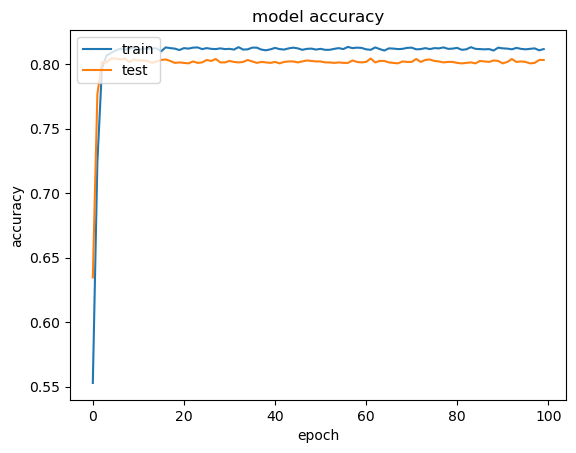

In [24]:
## summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

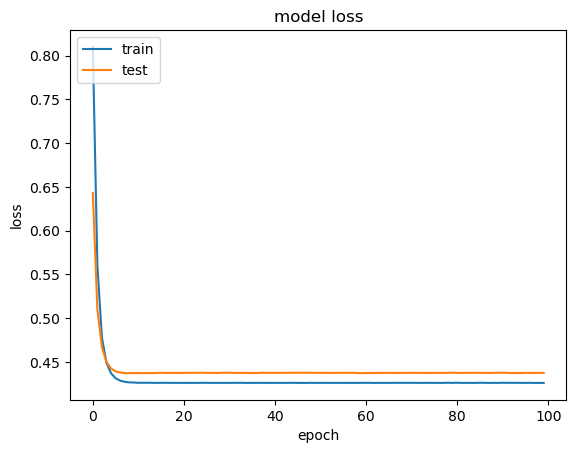

In [25]:
   ## summarize history for loss
    
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()